# Lets train a FFNN for a Regression Problem

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

## Reading the dataset

In [2]:
df=pd.read_csv('cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,2,48,236,66,0,2,0,1.1
1,1,48,260,51,0,2,1,7.0
2,1,44,187,49,1,2,0,7.0
3,2,42,216,57,1,2,0,0.4
4,2,56,156,42,0,2,0,2.2
5,1,44,162,57,1,2,0,3.0
6,1,50,244,47,0,2,0,4.2
7,1,48,212,30,1,2,0,17.4
8,2,66,202,53,0,2,1,13.4
9,1,63,186,46,1,2,0,17.3


# data and target

In [4]:
dataset=df.values

data=dataset[:,0:7]
target=dataset[:,7]

# Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

# Why Scaling?

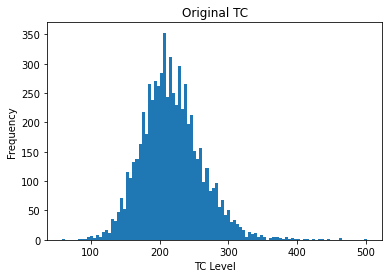

In [11]:
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

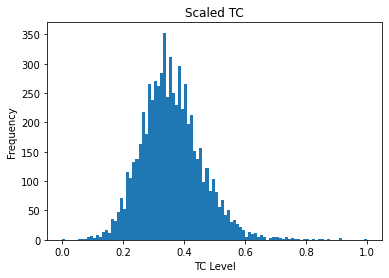

In [12]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

# Other Scaling Methods

## 1 Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

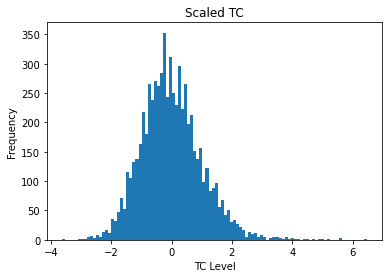

In [15]:
plt.hist(standard_scaled_data[:,2],bins=100)
plt.title('Quantiled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

This type of scaling removes mean and scale data to unit variance. It is defined by the formula
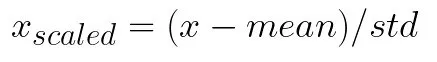
where mean is the mean of the training samples, and std is the standard deviation of the training samples. The best way to understand it is to look at it in practice. For that we use SciKit Learn and StandardScaler class:

## Quantile Transformation

As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution:

In [19]:
from sklearn.preprocessing import QuantileTransformer

qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed_data = qtrans.fit_transform(data)

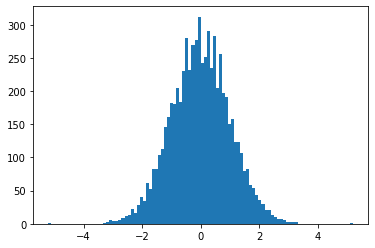

In [20]:
plt.hist(quantile_transformed_data[:,2],bins=100)
plt.show()

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

# FFNN Architecture

In [42]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout
import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=7, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [43]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Train on 4252 samples, validate on 1063 samples
Epoch 1/200
4252/4252 [==============================] - 0s 60us/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0555 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0429
Epoch 2/200
4252/4252 [==============================] - 0s 34us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0373 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0356
Epoch 3/200
4252/4252 [==============================] - 0s 35us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0369 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0343
Epoch 4/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0356 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0353
Epoch 5/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0355 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0333
Epoch 6/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0348

4252/4252 [==============================] - 0s 33us/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0320 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0326
Epoch 50/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0314 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0325
Epoch 51/200
4252/4252 [==============================] - 0s 35us/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0319 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0352
Epoch 52/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0312 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0327
Epoch 53/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0320 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0335
Epoch 54/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0322 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0320

4252/4252 [==============================] - 0s 35us/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0305 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0326
Epoch 98/200
4252/4252 [==============================] - 0s 31us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0301 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0319
Epoch 99/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0298 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0320
Epoch 100/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0302 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0330
Epoch 101/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0305 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0334
Epoch 102/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0309 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0

4252/4252 [==============================] - 0s 32us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0291 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0325
Epoch 146/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0291 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0331
Epoch 147/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0294 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0321
Epoch 148/200
4252/4252 [==============================] - 0s 34us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0294 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0346
Epoch 149/200
4252/4252 [==============================] - 0s 35us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0301 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0326
Epoch 150/200
4252/4252 [==============================] - 0s 31us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0291 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0

4252/4252 [==============================] - 0s 34us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0283 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0335
Epoch 194/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0285 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0352
Epoch 195/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0282 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0323
Epoch 196/200
4252/4252 [==============================] - 0s 33us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0280 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0330
Epoch 197/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0283 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0328
Epoch 198/200
4252/4252 [==============================] - 0s 32us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0279 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0

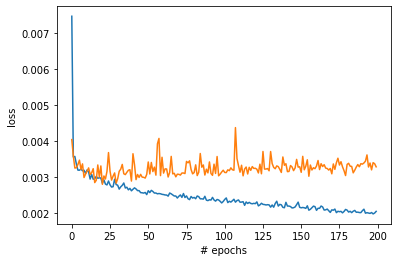

In [45]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

# Problem of Overfitting

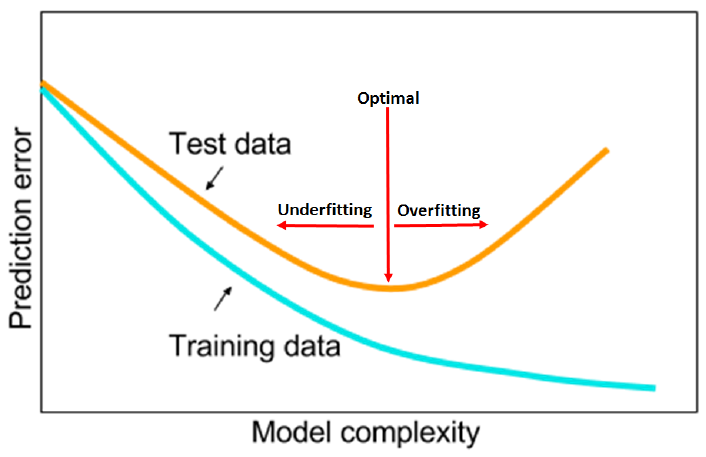

## Solutions,

1. Early Stopping
2. Dropout Layers
3. Batch Normalization
4. Reguralization
5. Reduce the Complexity
6. Data Augmentation

# R2 Score

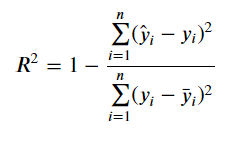

In [48]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,results)
print('r2 score:',r2)

r2 score: 0.8451341730432348


In [52]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.01992966 0.10785463 0.00820633 0.18991794 0.08323564 0.16295428
  0.11840563 0.07971864 0.09495897 0.81946073]]
predicted: [[0.01836863 0.19477165 0.00973572 0.20931742 0.08009458 0.23967373
  0.19196758 0.07577652 0.13043973 0.8045298 ]]


In [53]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 1.8  9.3  0.8 16.3  7.2 14.  10.2  6.9  8.2 70. ]]
predicted inverse scaled: [[ 1.6668442  16.714022    0.93045676 17.954775    6.932068   20.54417
  16.474834    6.563737   11.226509   68.72639   ]]


In [47]:
my_test_data=[1,56,156,42,0,1,0]
my_test_data=scaler_data.transform([my_test_data])
result=model.predict(my_test_data)
actual=7
predicted = scaler_target.inverse_transform(result)

print('Actual Result:',actual)
print('Predicted Result:',predicted)

Actual Result: 7
Predicted Result: [[8.190432]]
